## Quantum Oscillator

Our goal is to solve the one-dimensional, time-independent Schrodinger equation wave function for an electron in a harmonic (i.e., quadratic) potential 

\begin{equation}
V\left(x\right)=V_0\left(\frac{x^2}{a^2}\right)\
\end{equation}
where $V_0= 50$ eV  and $a=1\times 10^{11}$ m are constants. Use $\hbar = 197\times10^{-9} eV/c$ and $m = 0.511\times10^6 eV/c^2$ for electron mass.

The 1-D schrodinger equation is 
\begin{equation}
-\frac{\hbar}{2m}\frac{d^2 \psi}{d x^2} + V(x)\psi(x)=E\psi(x)
\end{equation}

We will use units of energy in eV, so  $\hbar$ becomes $\hbar c $and $m$ becomes $mc^2$ in the Schrodinger Eqn.

The Schrodinger equation has solutions only for discreet values of E, which are unknown. So, to solve this numerically, you will guess at the energy E for the ground state. Then solve the equation by starting at the left boundary (x = -∞) and check if the right boundary value is correct. Then adjust the value of E until you can match the right boundary (x = +∞).

Note that in theory the wavefunction goes all the way out to x = ±∞, but you can get good answers by using a large but finite interval. Try using x = −10a to +10a, with the wavefunction ψ = 0 at both boundaries. (In effect, you are putting the harmonic oscillator in a 20a wide box with impenetrable walls.) The wavefunction is real everywhere, so you don’t need to use complex variables, and you can use evenly spaced points in x for the solution (use linspace to create 100 points from -10a to +10a). The first derivative of the wave function is arbitrary since the solutions are equivalent relative to a normalizing factor, so set it to 1.



Load modules

In [2]:
from scipy.integrate import odeint
from numpy import linspace,array,zeros,log,exp,sin,cos,sqrt,pi,e, arange
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, xlim

Set parameters for the problem

In [3]:
V0= 50
a=1.e-11 # m
hbar=197*1e-9 # hbar-c
m=0.511*1e6 # eV/c2

1) Write down the time-independent Schrodinger equation for this problem and convert it from a second-order equation to two first-order ones (ie for $\psi$ and $\psi\prime$). Follow the lotka example in python to write a two-variable rate function for dpsi and dpsi_p.


Create our diff eq.

In [4]:
def schrodinger(x, Y):
    # unpack
    psi = Y[0]
    psi_p = Y[1]
    
    # compute rates
    Pot = V0*(x/a)**2
    dpsi_p = -(2*m/hbar**2)*(E-Pot)*psi
    dpsi = psi_p
            
        # pack rates into column vector
    rate = array([dpsi, dpsi_p])
    return rate

Set the initial values of $\psi(x=-10a)=0$ and $\psi'(x=-10a)=1$ (the first derivative is arbitrary since the solutions are equivalent to a normalization factor)


In [5]:
psi0 = 0
dpsi0 = 1
Y0 = array([psi0, dpsi0]) # pack the i.c. into array


# set the space interval for solving
Xstart= -10*a
Xend = 10*a 

# Form space array with 100 points

X = linspace(Xstart,Xend,100)

2) Use odeing to solve a test case for  E = 413 eV. 

Plot over the range -5a < x < 5a 

**Note** the added arguement in ODEINT to pass the value of E to schrodinger.


137.8 -0.06463709182691621


(-4.9999999999999995e-11, 4.9999999999999995e-11)

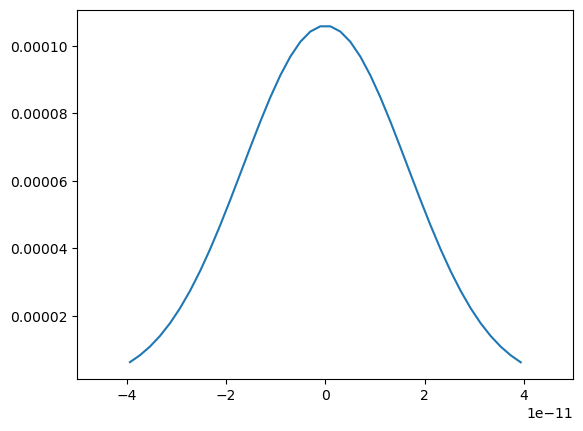

In [7]:
E = 137.8
solution = odeint(schrodinger, Y0, X, tfirst=True)
# unpack
psi = solution[:,0]
dpsi = solution[:,1]

print(E, psi[-1])

plot(X[30:-30],psi[30:-30])
xlim(-5*a,5*a)

3) How  can we find the right values (eigenvalues) for E where there is a solution?

The ground state has energy in the range 100 to 200 eV. Create a loop and adjust E from 100 to 200 in steps of 1 eV. 
Inside the loop, solve the Schrodinger equation with the initial conditions.
Print out value of psi at the end point (  psi[-1] ). The correct eigen state will have psi(+10a)=0. Select the value of E that comes closest. You can do this by by inspecting your output. Or you can write code to plot E vs psi or some other way to select the minimum if you want to get fancy. You can refine your answer by repeating the loop over a smaller interval (eg by 0.1 steps around the closes two values from the first time) or just interpolate.


In [15]:
for E in arange(130,140,0.5):
    solution = odeint(schrodinger, Y0, X, tfirst=True)
# unpack
    psi = solution[:,0]
    dpsi = solution[:,1]
    
    print(E, psi[-1])


130.0 77.56351759176007
130.5 71.96061682865124
131.0 66.44824983346695
131.5 61.02535861610921
132.0 55.69090616161148
132.5 50.44382960460619
133.0 45.28316916741447
133.5 40.20770602748338
134.0 35.21655989728612
134.5 30.308737556011362
135.0 25.483202785890047
135.5 20.738952884908674
136.0 16.0750636255623
136.5 11.490533267499524
137.0 6.984415725678425
137.5 2.5557614539980857
138.0 -1.7963446513244383
138.5 -6.072881252058582
139.0 -10.274746739395546
139.5 -14.402827850317369


From the ab=ove output, we can estimate that E=137.8 So try plotting for this value:

137.8 -0.06463709182691621


(-4.9999999999999995e-11, 4.9999999999999995e-11)

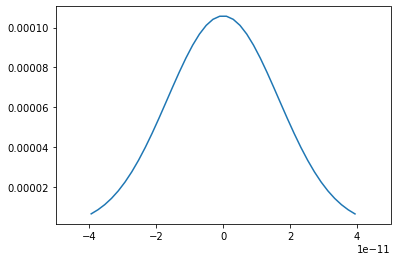

In [7]:
E = 137.8
solution = odeint(schrodinger, Y0, X, tfirst=True)
# unpack
psi = solution[:,0]
dpsi = solution[:,1]

print(E, psi[-1])

plot(X[30:-30],psi[30:-30])
xlim(-5*a,5*a)

## Using bisection method to find E

Basically we were finding a root by eye--estimating the value E where the table above crossed from positive to negative. We can use a bisection method to do this more precisely! First create a function LeftBoundary(E). We  want to find the roots of this function. I use a little trick here for lassing E to our schrodinger function by making a global variable. 

In [9]:
def  LeftBoundary(Ein):
    global E
    E = Ein
    solution = odeint(schrodinger, Y0, X, tfirst=True)
# unpack
    psi = solution[:,0]
    dpsi = solution[:,1]

    return psi[-1]

Now use brentq to find a root between 100 and 200:

In [12]:
from scipy.optimize import brentq

E_level = brentq(LeftBoundary, 300, 500)
print ('Energy level = ', E_level)

Energy level =  413.3776852329526


Now find a root between 600 and 700

In [29]:
E_level = brentq(LeftBoundary, 600, 700)
print ('Energy level = ', E_level)

Energy level =  688.9627974182233


688.9627974182233 5.727227530242985e-15


(-9.999999999999999e-11, 9.999999999999999e-11)

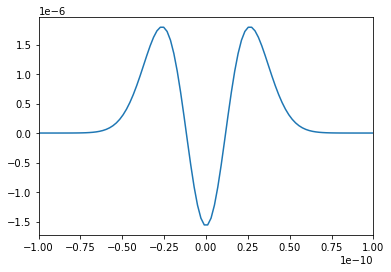

In [30]:
E = E_level
solution = odeint(schrodinger, Y0, X, tfirst=True)
# unpack
psi = solution[:,0]
dpsi = solution[:,1]

print(E, psi[-1])

plot(X,psi)
xlim(-10*a,10*a)